# YOLOv3 커스텀 데이터 학습

copy from https://articlearn.id/article/e5571bb0-how-to-train-yolov3-on-google-colab-to-de/

# 레이블링 데이터 위치

https://github.com/dhrim/deep_learning_data/raw/master/Raccoon_yolov3_darknet_format.zip

구글 드라이브 tmp/ 폴더에 Raccoon.zip 데이터 파일을 준비한다.






# 0. 임포트

In [ ]:
import cv2
import matplotlib.pyplot as plt
import glob


# 1. 구글 드라이브 마운트, mydrive로 링크

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/MyDrive/ /mydrive

# 2. Darknet 다운받아서 컴파일

## 프로젝트 다운로드

In [ ]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15395, done.
remote: Total 15395 (delta 0), reused 0 (delta 0), pack-reused 15395
Receiving objects: 100% (15395/15395), 14.02 MiB | 22.39 MiB/s, done.
Resolving deltas: 100% (10353/10353), done.


OpenCV, GPU, CuDNN 사용 관련 설정하고 컴파일

In [ ]:
%cd darknet

/content/darknet


## 컴파일 설정 파일 수정

In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

## 컴파일

In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

# 3. 데이터 준비
- darknet/data/obj에 latops_labeled.zip 압축 풀기
- classes.names와 training.data 파일 생성
- training.txt 파일 생성


In [ ]:
# !ls -al /mydrive/tmp/laptops_labeled.zip
!ls -al /mydrive/tmp/Raccoon.zip

-rw------- 1 root root 5997816 Jan  6 01:40 /mydrive/tmp/Raccoon.zip


## data/obj/laptops_labeled 폴더에 압축 풀기

In [ ]:
!rm -rf data/obj
!mkdir data/obj
# !unzip /mydrive/tmp/laptops_labeled.zip -d data/obj
!unzip /mydrive/tmp/Raccoon.zip -d data/obj/Raccoon

Archive:  /mydrive/tmp/Raccoon.zip
   creating: data/obj/Raccoon/test/
  inflating: data/obj/Raccoon/test/_darknet.labels  
  inflating: data/obj/Raccoon/test/raccoon-57_jpg.rf.26f3fae218f26088f6a7405c58ae8020.jpg  
  inflating: data/obj/Raccoon/test/raccoon-57_jpg.rf.26f3fae218f26088f6a7405c58ae8020.txt  
  inflating: data/obj/Raccoon/test/raccoon-58_jpg.rf.ff9de9977475e0086e7ab582122c5167.jpg  
  inflating: data/obj/Raccoon/test/raccoon-58_jpg.rf.ff9de9977475e0086e7ab582122c5167.txt  
  inflating: data/obj/Raccoon/test/raccoon-59_jpg.rf.388d6dd8c9d5a6fc7ca75790e680c269.jpg  
  inflating: data/obj/Raccoon/test/raccoon-59_jpg.rf.388d6dd8c9d5a6fc7ca75790e680c269.txt  
  inflating: data/obj/Raccoon/test/raccoon-60_jpg.rf.cff8b797e6b5c9b716b6be70be2b6b33.jpg  
  inflating: data/obj/Raccoon/test/raccoon-60_jpg.rf.cff8b797e6b5c9b716b6be70be2b6b33.txt  
  inflating: data/obj/Raccoon/test/raccoon-61_jpg.rf.58c4f561336525f59d395ce21508523b.jpg  
  inflating: data/obj/Raccoon/test/raccoon-61_jp

## 학습 위한 설정 파일 생성

### data/obj.names

In [ ]:
%%writefile data/obj.names
Racoon

Writing data/obj.names


In [ ]:
!cat data/obj.names

Racoon

In [ ]:
!cp data/obj.names data/coco.names

### data/obj.data

In [ ]:
%%writefile data/obj.data
classes = 1
train = data/train.txt
valid = data/test.txt
names = /content/darknet/data/obj.names
backup = /mydrive/tmp

Overwriting data/obj.data


In [ ]:
!cat data/obj.data

### data/train.txt


In [ ]:
!ls -al data/obj/Raccoon/train

total 5292
drwxr-xr-x 2 root root 32768 Jan  6 10:37 .
drwxr-xr-x 5 root root  4096 Jan 11 03:25 ..
-rw-r--r-- 1 root root 29260 Jun  8  2021 raccoon-100_jpg.rf.e9338202a924dc489ffd94e0291a0f39.jpg
-rw-r--r-- 1 root root    78 Jun  8  2021 raccoon-100_jpg.rf.e9338202a924dc489ffd94e0291a0f39.txt
-rw-r--r-- 1 root root 34570 Jun  8  2021 raccoon-101_jpg.rf.a9e8a95f51d60d7d3b40d3243aa11afd.jpg
-rw-r--r-- 1 root root    78 Jun  8  2021 raccoon-101_jpg.rf.a9e8a95f51d60d7d3b40d3243aa11afd.txt
-rw-r--r-- 1 root root 30824 Jun  8  2021 raccoon-102_jpg.rf.d140a1fcbfc8d62c7ad37167714f79df.jpg
-rw-r--r-- 1 root root    78 Jun  8  2021 raccoon-102_jpg.rf.d140a1fcbfc8d62c7ad37167714f79df.txt
-rw-r--r-- 1 root root 45941 Jun  8  2021 raccoon-103_jpg.rf.7148e5c7d785760fe9cb6b7762180977.jpg
-rw-r--r-- 1 root root    77 Jun  8  2021 raccoon-103_jpg.rf.7148e5c7d785760fe9cb6b7762180977.txt
-rw-r--r-- 1 root root 19239 Jun  8  2021 raccoon-104_jpg.rf.e5f8de5f977a32d8a7f2223574ff2b72.jpg
-rw-r--r-- 1 root 

In [ ]:
# ls -al data/obj/laptops_labeled 밑에 jpg 파일들이 있으면
# images_list = glob.glob("data/obj/laptops_labeled/*[jpg|png|jpeg]")
images_list = glob.glob("data/obj/Raccoon/train/*[jpg|png|jpeg]")

# ls -al data/obj 밑에 jpg 파일들이 있으면
# images_list = glob.glob("data/obj/*[jpg|png|jpeg]")

print(images_list)

# Create train.txt file
file = open("data/train.txt", "w") 
file.write("\n".join(images_list)) 
file.close() 

['data/obj/Raccoon/train/raccoon-195_jpg.rf.438757fc784e4d9f04d8c257fa103283.jpg', 'data/obj/Raccoon/train/raccoon-32_jpg.rf.b41a8efc0d66b3b2810bc90e15385817.jpg', 'data/obj/Raccoon/train/raccoon-175_jpg.rf.5c172ad47029edf77be38f333f49c6cd.jpg', 'data/obj/Raccoon/train/raccoon-42_jpg.rf.ba5583e11220792d39341e7eed4f9385.jpg', 'data/obj/Raccoon/train/raccoon-190_jpg.rf.18c3f6bf1a7b1cd3288edc357d75af5b.jpg', 'data/obj/Raccoon/train/raccoon-148_jpg.rf.93538e05d17b33d08bde474a425b5b2d.jpg', 'data/obj/Raccoon/train/raccoon-117_jpg.rf.b05cd921b42a5dda682dcc870518e462.jpg', 'data/obj/Raccoon/train/raccoon-144_jpg.rf.20b9bea695b9d1ed719968c1f41a0d62.jpg', 'data/obj/Raccoon/train/raccoon-186_jpg.rf.45717b7fa9e2864677cc082bd988f35f.jpg', 'data/obj/Raccoon/train/raccoon-107_jpg.rf.fcfeeca4a65ce335eaaf55935489ff4e.jpg', 'data/obj/Raccoon/train/raccoon-101_jpg.rf.a9e8a95f51d60d7d3b40d3243aa11afd.jpg', 'data/obj/Raccoon/train/raccoon-128_jpg.rf.d69ad1a11a7823bd0e3818419b1071d8.jpg', 'data/obj/Raccoon

In [ ]:
!cat data/train.txt

data/obj/Raccoon/train/raccoon-195_jpg.rf.438757fc784e4d9f04d8c257fa103283.jpg
data/obj/Raccoon/train/raccoon-32_jpg.rf.b41a8efc0d66b3b2810bc90e15385817.jpg
data/obj/Raccoon/train/raccoon-175_jpg.rf.5c172ad47029edf77be38f333f49c6cd.jpg
data/obj/Raccoon/train/raccoon-42_jpg.rf.ba5583e11220792d39341e7eed4f9385.jpg
data/obj/Raccoon/train/raccoon-190_jpg.rf.18c3f6bf1a7b1cd3288edc357d75af5b.jpg
data/obj/Raccoon/train/raccoon-148_jpg.rf.93538e05d17b33d08bde474a425b5b2d.jpg
data/obj/Raccoon/train/raccoon-117_jpg.rf.b05cd921b42a5dda682dcc870518e462.jpg
data/obj/Raccoon/train/raccoon-144_jpg.rf.20b9bea695b9d1ed719968c1f41a0d62.jpg
data/obj/Raccoon/train/raccoon-186_jpg.rf.45717b7fa9e2864677cc082bd988f35f.jpg
data/obj/Raccoon/train/raccoon-107_jpg.rf.fcfeeca4a65ce335eaaf55935489ff4e.jpg
data/obj/Raccoon/train/raccoon-101_jpg.rf.a9e8a95f51d60d7d3b40d3243aa11afd.jpg
data/obj/Raccoon/train/raccoon-128_jpg.rf.d69ad1a11a7823bd0e3818419b1071d8.jpg
data/obj/Raccoon/train/raccoon-127_jpg.rf.76bba62c5d0f

# 4. 사전 학습된 YOLOv3 모델 파일 다운로드

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2022-01-11 03:25:44--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  20.6MB/s    in 8.3s    

2022-01-11 03:25:53 (18.7 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# 5. 학습관련 설정 파일 수정

원 설정파일 yolov3.cfg를 yolv3_custom.cfg로 복사하고

복사한 설정파일을 수정

In [ ]:
# 탐지 대상 클래스 수를 설정
CLASS_NUM = 1

In [ ]:
!cp cfg/yolov3.cfg cfg/yolov3_custom.cfg

classes = CLASS_NUM
filters = (classes + 5) * 3
max_batches = classes * 2000
steps1 = int(max_batches*0.8)
steps2 = int(max_batches*0.9)
if max_batches < 6000:
  max_batches = 6000

# Edit classes & filters
!sed -i 's/batch=1/batch=64/' cfg/yolov3_custom.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_custom.cfg
!sed -i 's/max_batches = 500200/max_batches = $max_batches/' cfg/yolov3_custom.cfg
!sed -i '610 s@classes=80@classes=$classes@' cfg/yolov3_custom.cfg
!sed -i '696 s@classes=80@classes=$classes@' cfg/yolov3_custom.cfg
!sed -i '783 s@classes=80@classes=$classes@' cfg/yolov3_custom.cfg
!sed -i '603 s@filters=255@filters=$filters@' cfg/yolov3_custom.cfg
!sed -i '689 s@filters=255@filters=$filters@' cfg/yolov3_custom.cfg
!sed -i '776 s@filters=255@filters=$filters@' cfg/yolov3_custom.cfg
!sed -i 's/steps=400000,450000/steps=$steps1,$steps2/' cfg/yolov3_custom.cfg

# 6. 학습 실행

학습된 모델은  /mydrive/tmp/yolov3_custom_last.weights 로 저장된다.

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show
# !./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_custom
 0 : compute_capability = 700, cudnn_half = 0, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 B

## 7. 탐지 실행

In [ ]:
!./darknet detect cfg/yolov3_custom.cfg /mydrive/tmp/yolov3_custom_last.weights data/obj/Raccoon/test/raccoon-57_jpg.rf.26f3fae218f26088f6a7405c58ae8020.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 0, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcu

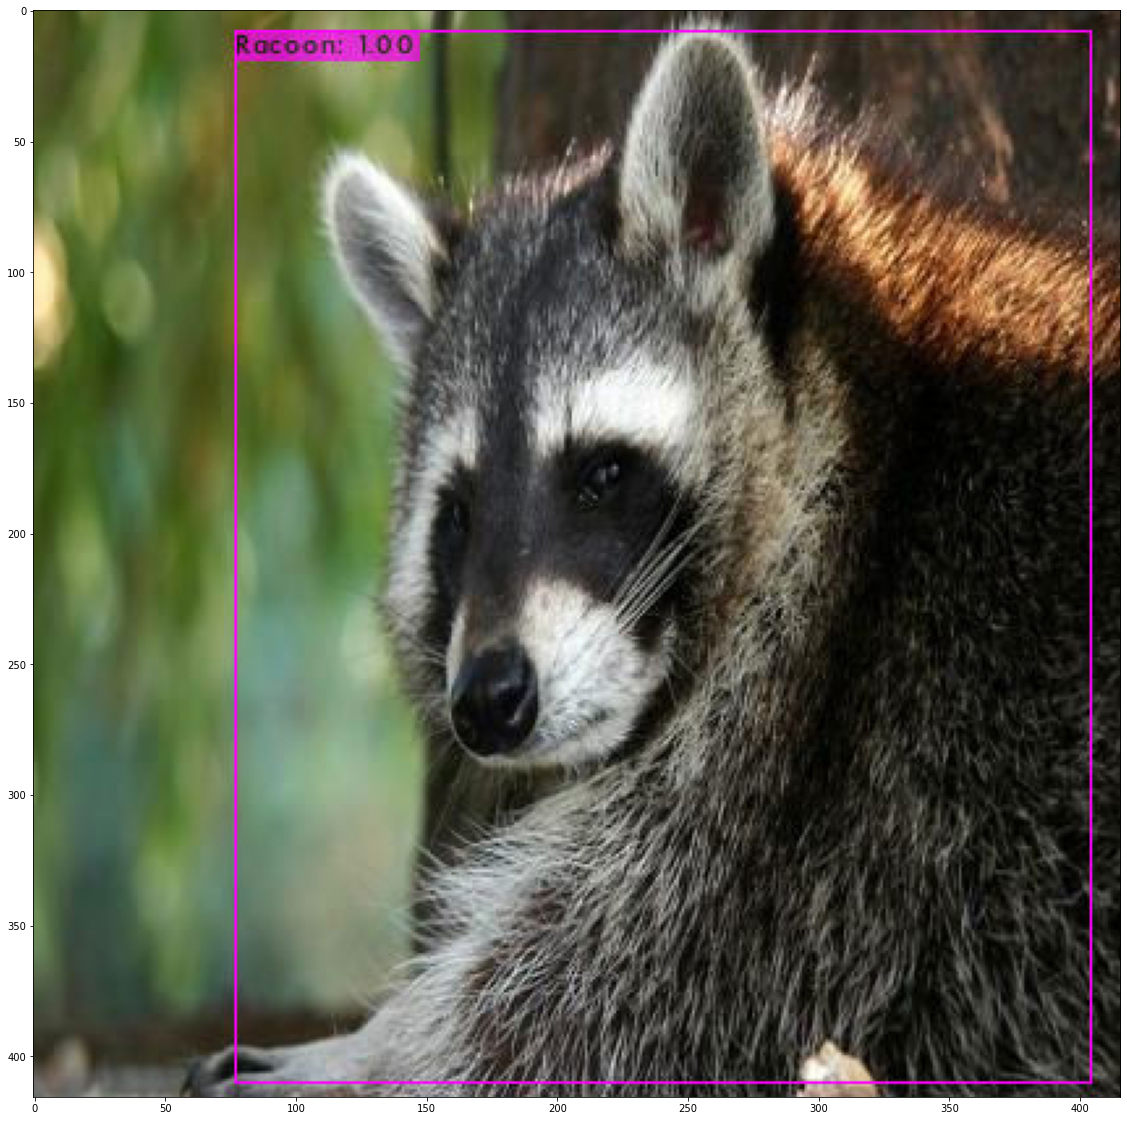

In [ ]:
pred = plt.imread('predictions.jpg')
plt.figure(figsize=(20,20))
plt.imshow(pred)
plt.show()